In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
%matplotlib inline

In [3]:
from keras.callbacks import Callback
from matplotlib import pyplot as plt
from IPython.display import clear_output
class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('auc'))
        self.val_acc.append(logs.get('val_auc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(15,10))
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="validation_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
import telepot
def send_notify(text):
    with open('../../_access_keys/telegram_token.txt', 'r') as content_file:
        token = content_file.read()
    with open('../../_access_keys/user.txt', 'r') as content_file:
        user = content_file.read()
    try:
        TelegramBot = telepot.Bot(token)
        TelegramBot.sendMessage(int(user), text)
    except:
        pass

In [5]:
TRAIN = True

In [6]:
path = 'c:/data/mlbootcamp/dataset/'
path_train = path + 'train/'
path_test = path + 'test/'
path_features = 'features/'
if TRAIN:
    pathfiles = path_train
    path_subs_bs_consumption = 'subs_bs_consumption_train.csv'
    path_subs_bs_data_session = 'subs_bs_data_session_train.csv'
    path_subs_bs_voice_session = 'subs_bs_voice_session_train.csv'
    path_subs_features = 'subs_features_train.csv'
    path_subs_csi = 'subs_csi_train.csv'
    path_new_features = 'features.csv'
else:
    pathfiles = path_test
    path_subs_bs_consumption = 'subs_bs_consumption_test.csv'
    path_subs_bs_data_session = 'subs_bs_data_session_test.csv'
    path_subs_bs_voice_session = 'subs_bs_voice_session_test.csv'
    path_subs_features = 'subs_features_test.csv'
    path_subs_csi = 'subs_csi_test.csv'
    path_new_features = 'features.csv'

In [7]:
subs_csi = pd.read_csv(pathfiles + path_subs_csi, sep=';', decimal=',')

In [8]:
subs_csi.head(1)

,SK_ID,CSI,CONTACT_DATE
0,2,0,04.05


In [9]:
subs_csi.shape

(4222, 3)

In [10]:
subs_bs_consumption = pd.read_csv(pathfiles + path_subs_bs_consumption, sep=';', decimal=',')

In [11]:
subs_bs_consumption['month'] = subs_bs_consumption['MON'].apply(lambda x:int(str(x).split('.')[1]))

In [12]:
subs_bs_consumption.head(1)

,SK_ID,CELL_LAC_ID,MON,SUM_MINUTES,SUM_DATA_MB,SUM_DATA_MIN,month
0,1827,240277,01.03,0.0,0.000002,0.000234,3


In [13]:
subs_bs_consumption.shape

(1092544, 7)

In [14]:
subs_bs_data_session = pd.read_csv(pathfiles + path_subs_bs_data_session, sep=';', decimal=',')

In [15]:
subs_bs_data_session.head(1)

,SK_ID,CELL_LAC_ID,DATA_VOL_MB,START_TIME
0,3853,61951,0.000004,04.04 05:00:00


In [16]:
subs_bs_data_session.shape

(3473203, 4)

In [17]:
subs_features = pd.read_csv(pathfiles + path_subs_features, sep=';', decimal=',')

In [18]:
subs_features.head(1)

,SNAP_DATE,COM_CAT#1,SK_ID,COM_CAT#2,COM_CAT#3,BASE_TYPE,ACT,ARPU_GROUP,COM_CAT#7,COM_CAT#8,...,COM_CAT#25,COM_CAT#26,COM_CAT#27,COM_CAT#28,COM_CAT#29,COM_CAT#30,COM_CAT#31,COM_CAT#32,COM_CAT#33,COM_CAT#34
0,01.08.01,4,3339,80,5,2,1,12.0,1,1489.0,...,1,1,0.031696,0.076724,0.040279,0.0133,0.083382,0.027579,0.103896,2.0


In [19]:
subs_features.shape

(47411, 36)

In [20]:
subs_features['SNAP_DATE'] = subs_features['SNAP_DATE'].apply(lambda x:datetime.strptime(x, '%d.%m.%y'))

In [21]:
cats = subs_features['COM_CAT#24'].unique()
subs_features['COM_CAT#242'] = pd.Categorical(subs_features['COM_CAT#24'], categories=cats)
subs_features['COM_CAT#242'] = subs_features['COM_CAT#242'].cat.codes

In [22]:
subs_features['COM_CAT#34'].fillna(0, inplace=True)
subs_features['COM_CAT#8'].fillna(0, inplace=True)
subs_features['DEVICE_TYPE_ID'].fillna(0, inplace=True)
subs_features['ARPU_GROUP'].fillna(0, inplace=True)
subs_features['INTERNET_TYPE_ID'].fillna(0, inplace=True)

In [23]:
subs_features.dropna().shape

(47411, 37)

In [24]:
subs_features['month'] = subs_features['SNAP_DATE'].apply(lambda x:x.month)
subs_features['year'] = subs_features['SNAP_DATE'].apply(lambda x:x.year)

In [25]:
def get_subs_features(year, month, fix_month, day, sk_id):
    data = subs_features[(subs_features['year'] == year) & (subs_features['month'] == month) & (subs_features['SK_ID'] == sk_id)]
    columns = ['COM_CAT#1', 'COM_CAT#2', 'COM_CAT#3', 'BASE_TYPE', 'ACT', 'ARPU_GROUP', 'COM_CAT#7', 'COM_CAT#8',
              'DEVICE_TYPE_ID', 'INTERNET_TYPE_ID', 'REVENUE', 'ITC', 'VAS', 'RENT_CHANNEL', 'ROAM',
              'COST', 'COM_CAT#242']
    for i in range(18):
        if i + 17 == 24:
            if data.shape[0] == 1:
                d = data[['COM_CAT#24']].values[0].tolist()[0]
                dt = str(d).split('.')
                c_month = int(dt[1])
                c_day = int(dt[0])
                delta = (datetime(2002, fix_month, day) - datetime(2001 if d == '31.12' else 2002, c_month, c_day)).days
            continue
        columns.append('COM_CAT#{}'.format(i+17))
    if data.shape[0] == 1:
        return columns, data[columns].values[0].tolist()
    else:
        return columns, np.zeros(len(columns))

In [26]:
# for dnn
table = []
if TRAIN:
    y = np.zeros(subs_csi.shape[0])
for i in enumerate(subs_csi.values):
    sk_id = int(i[1][0])
    line = [sk_id]
    table_columns = ['sk_id']
    if TRAIN:
        dt = str(i[1][2]).split('.')
    else:
        dt = str(i[1][1]).split('.')
    year = 2002
    month = int(dt[1])
    for j in range(12):
        new_line = get_subs_features(year, month, int(dt[1]), int(dt[0]), sk_id)
        line.extend(new_line[1])
        table_columns.extend(new_line[0])
        month -= 1
        if month == 0:
            month = 12
            year -= 1
    table.append(line)
    if TRAIN:
        y[i[0]] = i[1][1]

In [27]:
data = pd.DataFrame(data=table, columns=table_columns)

In [28]:
columns_avg = ['CELL_AVAILABILITY_2G', 'CELL_AVAILABILITY_3G',
       'CELL_AVAILABILITY_4G', 'CSSR_2G', 'CSSR_3G',
       'ERAB_PS_BLOCKING_RATE_LTE', 'ERAB_PS_BLOCKING_RATE_PLMN_LTE',
       'ERAB_PS_DROP_RATE_LTE', 'HSPDSCH_CODE_UTIL_3G',
       'NODEB_CNBAP_LOAD_HARDWARE', 'PART_CQI_QPSK_LTE', 'PART_MCS_QPSK_LTE',
       'PROC_LOAD_3G', 'PSSR_2G', 'PSSR_3G', 'PSSR_LTE',
       'RAB_CS_BLOCKING_RATE_3G', 'RAB_CS_DROP_RATE_3G',
       'RAB_PS_BLOCKING_RATE_3G', 'RAB_PS_DROP_RATE_3G', 'RBU_AVAIL_DL',
       'RBU_AVAIL_DL_LTE', 'RBU_AVAIL_UL', 'RBU_OTHER_DL', 'RBU_OTHER_UL',
       'RBU_OWN_DL', 'RBU_OWN_UL', 'RRC_BLOCKING_RATE_3G',
       'RRC_BLOCKING_RATE_LTE', 'RTWP_3G', 'SHO_FACTOR', 'TBF_DROP_RATE_2G',
       'TCH_DROP_RATE_2G', 'UTIL_BRD_CPU_3G', 'UTIL_CE_DL_3G',
       'UTIL_CE_HW_DL_3G', 'UTIL_CE_UL_3G', 'UTIL_SUBUNITS_3G',
       'UL_VOLUME_LTE', 'DL_VOLUME_LTE', 'TOTAL_DL_VOLUME_3G',
       'TOTAL_UL_VOLUME_3G']

In [29]:
columns_chhn = ['AVEUSERNUMBER', 'AVEUSERNUMBER_PLMN',
       'AVR_DL_HSPA_USER_3G', 'AVR_DL_R99_USER_3G', 'AVR_DL_USER_3G',
       'AVR_DL_USER_LTE', 'AVR_TX_POWER_3G', 'AVR_UL_HSPA_USER',
       'AVR_UL_R99_USER', 'AVR_UL_USER_3G', 'AVR_UL_USER_LTE',
       'DL_AVR_THROUGHPUT_3G', 'DL_AVR_THROUGHPUT_LTE',
       'DL_AVR_THROUGHPUT_R99', 'DL_MEAN_USER_THROUGHPUT_LTE',
       'DL_MEAN_USER_THROUGHPUT_DL_2G', 'DL_MEAN_USER_THROUGHPUT_HSPA3G',
       'DL_MEAN_USER_THROUGHPUT_PLTE', 'DL_MEAN_USER_THROUGHPUT_REL93G',
       'HSDPA_USERS_3G', 'HSUPA_USERS_3G', 'RBU_USED_DL', 'RBU_USED_UL',
       'RELATIVE_RBU_USED_DL', 'RELATIVE_RBU_USED_UL', 'RELATIVE_TX_POWER_3G',
       'UL_AVR_THROUGHPUT_3G', 'UL_AVR_THROUGHPUT_LTE',
       'UL_AVR_THROUGHPUT_R99', 'UL_MEAN_USER_THROUGHPUT_LTE',
       'UL_MEAN_USER_THROUGHPUT_HS3G', 'UL_MEAN_USER_THROUGHPUT_PLTE',
       'UL_MEAN_USER_THROUGHPUT_REL93G']

In [30]:
def get_columns(count, postfix):
    return ['{} {}'.format(i, postfix) for i in range(count)]       

In [ ]:
scalers = {}

In [54]:
def get_extend_data(type_data, column_name, count, postfix):
    fname = pathfiles + path_features + '{}_{}.csv'.format(type_data, column_name)
    result = pd.read_csv(fname)
    table = []
    result = result[get_columns(count, postfix)]
    result.fillna(np.nanmean(result), inplace=True)
    for i in result.values:
        table.append(np.array(i).reshape((count, 1)))
    res_table = np.array(table)
    
    if TRAIN:
        scale_mean = np.mean(res_table)
        res_table -= scale_mean
        scale_std = np.std(res_table)
        if scale_std != 0:
            res_table /= scale_std
        scalers[(type_data, column_name, count, postfix)] = (scale_mean, scale_std)
    else:
        scale_mean = scalers[(type_data, column_name, count, postfix)][0]
        scale_std = scalers[(type_data, column_name, count, postfix)][1]
        res_table -= scale_mean
        if scale_std != 0:
            res_table /= scale_std
    return res_table

def get_all_data():
    result = None
    count_days = 30
    for columns in [columns_avg, columns_chhn]:
        for c in columns:
            for type_data in ['data', 'voice']:
                if result is None:
                    result = np.concatenate([get_extend_data(type_data, c, count_days, 'sum'), get_extend_data(type_data, c, count_days, 'count')], axis=2)
                for a in ['min', 'avg', 'max', 'mina', 'avga', 'maxa']:
                    t = get_extend_data(type_data, c, count_days, a)
                    result = np.concatenate([result, t], axis=2)
    return result

In [55]:
data2 = get_all_data()

In [56]:
data.drop(['sk_id'], axis=1, inplace=True)

KeyError: "['sk_id'] not found in axis"

In [36]:
data.fillna(0, inplace=True)

In [57]:
X1 = np.asarray(data)
X2 = np.asarray(data2)
y = np.asarray(y)

In [58]:
print(X1.shape)
print(X2.shape)

(4222, 408)
(4222, 30, 902)


In [59]:
X1 = np.array(X1.tolist())
X2 = np.array(X2.tolist())

In [60]:
print(X1.shape)
print(X2.shape)

(4222, 408)
(4222, 30, 902)


In [61]:
from sklearn import preprocessing

In [62]:
if TRAIN:
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(data.values)
    data = pd.DataFrame(x_scaled)
else:
    x_scaled = min_max_scaler.transform(data.values)
    data = pd.DataFrame(x_scaled)

In [63]:
X1 = np.asarray(data)
y = np.asarray(y)

In [64]:
from sklearn.model_selection import train_test_split

In [142]:
X_train_1, X_test_1, X_train_2, X_test_2, y_train, y_test = train_test_split(X1, X2, y, test_size=0.2, random_state=423)

In [66]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)

In [67]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Input, GlobalMaxPooling1D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [68]:
from sklearn.metrics import roc_auc_score
from keras import regularizers, Input, layers

In [69]:
from sklearn import metrics
from keras import backend as K
import tensorflow as tf
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [212]:
def create_model(dim_input=1024, dnn_size_dropout=0.5, count_layers=5, conv_input=32, conv_dense_input=64):
    #build Keras model
    
    cnn_input = Input(shape=X_test_2.shape[1:], dtype='float32')
    x_0 = Conv1D(conv_input, 3, activation='relu')(cnn_input)
    x_0 = MaxPooling1D(3)(x_0)
    x_0 = Conv1D(conv_input, 3, activation='relu')(x_0)
    x_0 = GlobalMaxPooling1D()(x_0)
    x_0 = Dense(conv_dense_input, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x_0)
    x_0 = Dropout(dnn_size_dropout)(x_0)
    x_0 = Dense(conv_dense_input, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x_0)
    
    dnn_input = Input(shape=X_test_1.shape[1:], dtype='float32')
    x_1 = Dense(dim_input, activation="relu", kernel_initializer="uniform", kernel_regularizer=regularizers.l2(0.01))(dnn_input)
    x_1 = Dropout(dnn_size_dropout)(x_1)
    for i in range(count_layers):
        x_1 = Dense(dim_input, activation="relu", kernel_initializer="uniform", kernel_regularizer=regularizers.l2(0.01))(x_1)
        x_1 = Dropout(dnn_size_dropout)(x_1)
    
    concatenated = layers.concatenate([x_0, x_1], axis=-1)
    
    preds = Dense(1, activation='sigmoid')(concatenated)
        
    model = Model([cnn_input, dnn_input], preds)
        
    model.compile(loss='binary_crossentropy', metrics=[auc], optimizer='adam')
    return model

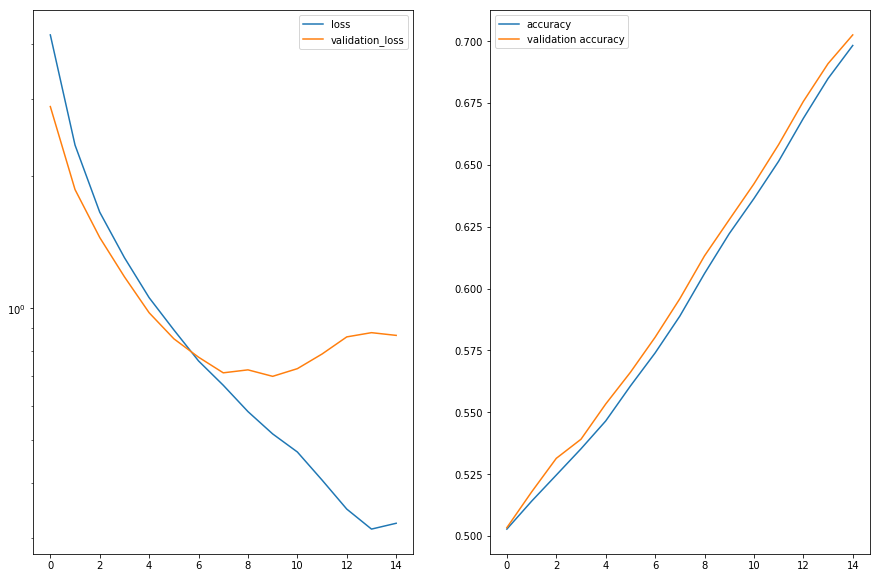

2701/2701 [==============================] - 3s 1ms/step - loss: 0.3238 - auc: 0.6982 - val_loss: 0.8675 - val_auc: 0.7025
Epoch 16/300
 128/2701 [>.............................] - ETA: 2s - loss: 0.2301 - auc: 0.7022

KeyboardInterrupt: 

In [213]:
count_epochs = 300
model = create_model(dim_input=256, dnn_size_dropout=0.5, count_layers=3, conv_input=128, conv_dense_input=128)
early_stopping_monitor = EarlyStopping(patience=10)
history = model.fit([np.array(X_train_2), np.array(X_train_1)], np.array(y_train), batch_size = 128, epochs = count_epochs, verbose=1, validation_split=0.2, class_weight=class_weights, callbacks=[plot,early_stopping_monitor])

In [189]:
histories = []
list_batch_size = [16, 32, 96, 128, 256]
list_dim_input = [64, 28, 256, 512, 1024]
list_dnn_size_dropout = [0.1, 0.2, 0.4, 0.5]
list_count_layers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for batch_size in list_batch_size:
    for dim_input in list_dim_input:
        for dnn_size_dropout in list_dnn_size_dropout:
            for count_layers in list_count_layers:
                count_epochs = 1000
                model = create_model(dim_input=dim_input, dnn_size_dropout=dnn_size_dropout, count_layers=count_layers)
                early_stopping_monitor = EarlyStopping(patience=10)
                history = model.fit([np.array(X_train_2), np.array(X_train_1)], np.array(y_train), batch_size = batch_size, epochs = count_epochs, verbose=0, validation_split=0.2, class_weight=class_weights, callbacks=[early_stopping_monitor])
                histories.append(history.history)
                print(history.history)

{'val_loss': [0.649985677920855, 0.5027992095820297, 0.4827307162905586, 0.5026929036400022, 0.49489235401858944, 0.5626901903096035, 0.6099980644573121, 0.7197702978489667, 0.8257927667988828, 0.9614167841228508, 0.8568633645772934, 0.9586251176585107, 0.9129772477248717], 'val_auc': [0.5042098295053786, 0.5310729692673543, 0.5581870759732624, 0.5837573663017454, 0.6114607661433474, 0.6402182487341074, 0.6687079213074678, 0.6936384316026811, 0.7149561400244222, 0.7333761785157333, 0.7485670669544378, 0.7632179031005273, 0.7752887289199604], 'loss': [6.850633417244798, 0.5483411385235368, 0.47428875603264503, 0.4377850021357362, 0.40360389392228535, 0.3541590817678156, 0.30716515894908897, 0.2707654322707534, 0.24309796827539432, 0.20810988139373557, 0.194377849357784, 0.16677108038491295, 0.16565630528406936], 'auc': [0.5073831668389104, 0.5194447001277496, 0.5482244832521895, 0.5704110364303109, 0.5997133975292038, 0.6275951998051075, 0.6556019742636273, 0.6832817313363048, 0.7055582

KeyboardInterrupt: 

In [ ]:
history_gr = history.history['val_loss']
import matplotlib.pyplot as plt
epochs = range(1, len(history_gr) + 1)
plt.plot(epochs, history_gr, 'b+', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [105]:
send_notify('Complete fit')

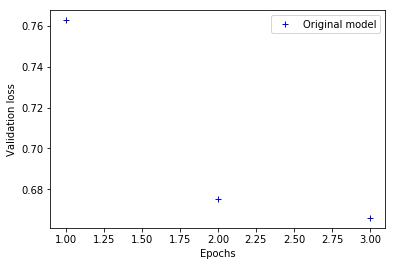

In [202]:
history_gr = history.history['val_loss']
import matplotlib.pyplot as plt
epochs = range(1, len(history_gr) + 1)
plt.plot(epochs, history_gr, 'b+', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [211]:
predict = model.predict([np.array(X_test_2), np.array(X_test_1)])
score = roc_auc_score(y_test, predict)
print("Total roc auc score = {0:0.4f}".format(score))

Total roc auc score = 0.4529


In [141]:
model_json = model.to_json()
# Записываем модель в файл
json_file = open("output/sale_model3.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("output/sale_model3.h5")

In [142]:
def save_predict(predict):
    with open('second.csv', 'w') as f:
        for item in predict:
            f.write("%s\n" % item[0])

In [144]:
save_predict(model.predict([np.array(X2), np.array(X1)]))